# **End to End Dog Breed Classification**

## **Download Data from dropbox**

In [1]:
## download data from dropbox
!wget https://www.dropbox.com/s/9kjr0ui9qbodfao/dog-breed-identification.zip # download files from Dropbox as zip

import os
import zipfile

local_zip = 'dog-breed-identification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('Dog Vision') # unzip the files into a file called "Dog Vision"
zip_ref.close()

--2021-12-11 08:57:56--  https://www.dropbox.com/s/9kjr0ui9qbodfao/dog-breed-identification.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.68.18, 2620:100:6022:18::a27d:4212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.68.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/9kjr0ui9qbodfao/dog-breed-identification.zip [following]
--2021-12-11 08:57:56--  https://www.dropbox.com/s/raw/9kjr0ui9qbodfao/dog-breed-identification.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc5fbbe5d6da38408db5b66ab0b4.dl.dropboxusercontent.com/cd/0/inline/Bbq8fkIz3pbuhCdvBfCh39fC9RfZUMMt8DoIDslTvG3749aR7VtlE1dh3mEHuIDfrZ3IVmN6DJVDD3z70wZ7klQNYXTqoiEYG69h7gFqSECxZT66oRr6Vz0M6QohAFGYxYZZartF8PRXCASjcIQ9CAS0/file# [following]
--2021-12-11 08:57:56--  https://uc5fbbe5d6da38408db5b66ab0b4.dl.dropboxusercontent.com/cd/0/inline/Bbq8fkIz3pbuhCdvBfCh39fC9RfZUMMt8DoIDsl

## **Import Necessary Modules**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_hub as hub
from sklearn.model_selection import train_test_split
import datetime
from sklearn.metrics import classification_report, confusion_matrix
import os
print("Modules imported")
print("TF verison:", tf.__version__)
print("TF Hub version:", hub.__version__)
# check if notebook is running on GPU or not
print("GPU available!") if tf.config.list_physical_devices("GPU") else "Not Available!"

Modules imported
TF verison: 2.7.0
TF Hub version: 0.12.0
GPU available!


## **Load Id and labels of Images**

In [3]:
labels_csv = pd.read_csv(r"/content/Dog Vision/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     e4a43542e9d62fff9a6a95e3ce39942d  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


In [4]:
# Check medain count of each class
print("Median of Labels value count: ",labels_csv["breed"].value_counts().median())
print("value Count of each class")
labels_csv["breed"].value_counts()

Median of Labels value count:  82.0
value Count of each class


scottish_deerhound      126
maltese_dog             117
afghan_hound            116
entlebucher             115
bernese_mountain_dog    114
                       ... 
golden_retriever         67
komondor                 67
brabancon_griffon        67
eskimo_dog               66
briard                   66
Name: breed, Length: 120, dtype: int64

In [5]:
# How many images are there of each breed?
# labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));

### **Visualize count of each class labels**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


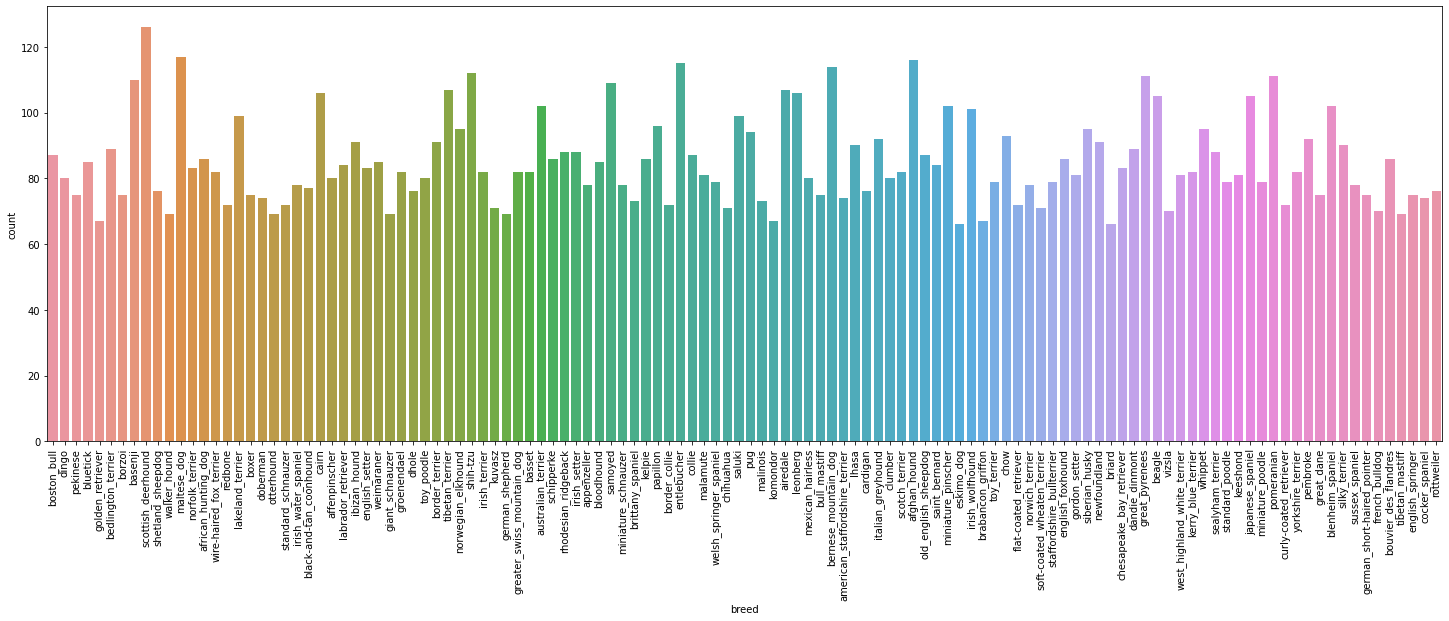

In [6]:
fig, ax = plt.subplots(figsize = (25,8))
sns.countplot(labels_csv["breed"], ax = ax)
plt.xticks(rotation = 90);

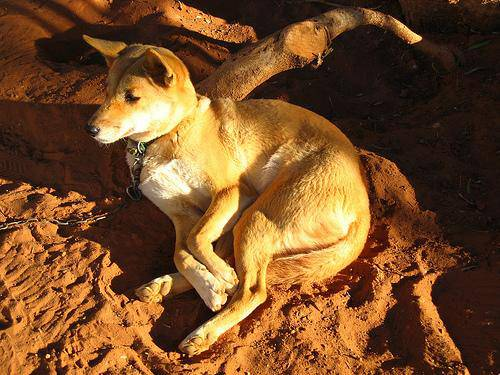

In [7]:
# load random image from train data and display it
from IPython.display import display,Image
Image("/content/Dog Vision/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg")

## **Getting Train image filenames and their labels**

In [8]:
labels_csv.head()

,id,breed
0,000bec180eb18c7604dcecc8fe0dba07,boston_bull
1,001513dfcb2ffafc82cccf4d8bbaba97,dingo
2,001cdf01b096e06d78e9e5112d419397,pekinese
3,00214f311d5d2247d5dfe4fe24b2303d,bluetick
4,0021f9ceb3235effd7fcde7f7538ed62,golden_retriever


In [9]:
# list with filenames of trian images
filenames = ["/content/Dog Vision/train/" + fname + ".jpg" for fname in labels_csv["id"]]
# filenames

### **Check if number of filenames matches number of actual image files for training set**

In [10]:
if  len(os.listdir("/content/Dog Vision/train/")) ==  len(filenames):
  print("Filenames match actual amount of files!!! Proceed.")

else:
  print("Filenames donot match actual amount of files, check the target directory.")

Filenames match actual amount of files!!! Proceed.


### **Check random image and it's label**

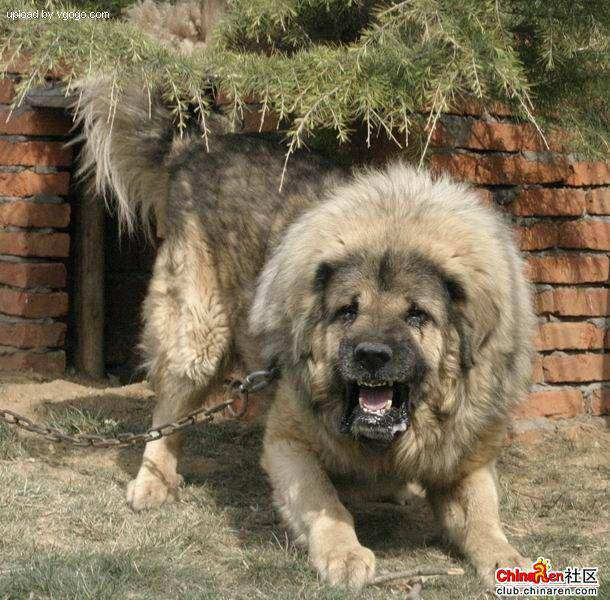

In [11]:
# Check random Image
Image(filenames[9000])

In [12]:
# check random image label
labels_csv["breed"][9000]

'tibetan_mastiff'

### **Prepare Labels for classification**

In [13]:
# convert labels column to NumPy array
labels = labels_csv["breed"].to_numpy()
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [14]:
len(labels)

10222

### **Check if labels and filenames(features) are of same length**

In [15]:
if len(labels) ==  len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels doesnot match number of filenames, check data directories")

Number of labels matches number of filenames!


In [16]:
unique_breeds = np.unique(labels)
len(unique_breeds)

120

In [17]:
# Example: Turn one label into an array of booleans
print(labels[0])
labels[0] == unique_breeds # use comparison operator to create boolean array

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [18]:
# Turn every label into a boolean array
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [19]:
len(boolean_labels)

10222

In [20]:
# Example: Turning a boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])[0][0]) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


## **Creating train and validation set from training data. Tune NUM_IMAGES param**

In [21]:
# Setup X & y variables
X = filenames
y = boolean_labels

when doing experiments on high number of data, it takes lot of time in training models. Reducing train data for expirimenting.

In [22]:
# Set number of images to use for experimenting
# slider option works in google colab
NUM_IMAGES = 3000 #@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES

3000

In [23]:
# Split them into training and validation using NUM_IMAGES param
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES], 
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(2400, 2400, 600, 600)

In [24]:
# verifying train data
X_train[:5], y_train[:2]

(['/content/Dog Vision/train/0fb1454104deee316f52244bb2037b37.jpg',
  '/content/Dog Vision/train/113ef2bb9e14d89f927314f73d573313.jpg',
  '/content/Dog Vision/train/053106ed091eac5e129225315ef6cfcb.jpg',
  '/content/Dog Vision/train/2a26dd719f6ab87fc13eb834d9a9f8e6.jpg',
  '/content/Dog Vision/train/18de05937a44cb467b229889f8a95bcb.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False,  True, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         Fa

## **Preprocessing (turning images into tensors)**

In [25]:
# cover image to numpy array
image = plt.imread(filenames[42])
image.shape

(257, 350, 3)

In [26]:
image.max()

255

In [27]:
image.min()

0

In [28]:
# turn image into tensor
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  87],
        [ 76, 124,  74],
        [ 63, 111,  59],
        ...,
        [ 76, 134,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  73],
        [ 67, 114,  68],
        [ 63, 111,  63],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 131,  86]]], dtype=uint8)>

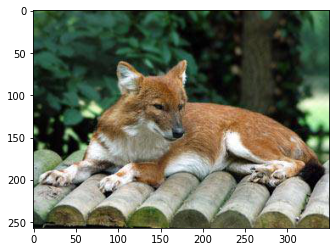

In [29]:
plt.imshow(image)

### **Function to turn images into tensors and resize them: process_image()**


In [30]:
# Define image size
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

In [31]:
# step by step process_image() func. execution
tensor = tf.io.read_file(filenames[42])
print("image imported:")
print(tensor)
tensor = tf.image.decode_jpeg(tensor, channels = 3)
print("image converted to int format, tensor:")
print(tensor[:1])
tensor = tf.image.convert_image_dtype(tensor, tf.float32)
print("Image normalized:")
print(tensor[:1])
print("Shape of image:\n", tf.shape(tensor))
tensor = tf.image.resize(tensor, size = [IMG_SIZE, IMG_SIZE])
print("Shape of image after resize:\n", tf.shape(tensor))


image imported:
tf.Tensor(b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\n\x07\x07\x08\x07\x06\n\x08\x08\x08\x0b\n\n\x0b\x0e\x18\x10\x0e\r\r\x0e\x1d\x15\x16\x11\x18#\x1f%$"\x1f"!&+7/&)4)!"0A149;>>>%.DIC<H7=>;\xff\xdb\x00C\x01\n\x0b\x0b\x0e\r\x0e\x1c\x10\x10\x1c;("(;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;\xff\xc0\x00\x11\x08\x01\x01\x01^\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1f\x00\x00\x01\x05\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\x06\x07\x08\t\n\x0b\xff\xc4\x00\xb5\x10\x00\x02\x01\x03\x03\x02\x04\x03\x05\x05\x04\x04\x00\x00\x01}\x01\x02\x03\x00\x04\x11\x05\x12!1A\x06\x13Qa\x07"q\x142\x81\x91\xa1\x08#B\xb1\xc1\x15R\xd1\xf0$3br\x82\t\n\x16\x17\x18\x19\x1a%&\'()*456789:CDEFGHIJSTUVWXYZcdefghijstuvwxyz\x83\x84\x85\x86\x87\x88\x89\x8a\x92\x93\x94\x95\x96\x97\x98\x99\x9a\xa2\xa3\xa4\xa5\xa6\xa7\xa8\xa9\xaa\xb2\xb3\xb4\xb5\xb6\xb7\xb8\xb9\xba\xc2\xc3\xc4\xc5\xc6\xc7\xc8\xc9\xca\xd2\xd3\xd4\xd5

### **Function to return tuple (image, label): get_image_label()**


In [32]:
# Create a simple function to return a tuple (image, label)
def get_image_label(image_path, label):
  """
  Takes an image file path name and the associated label,
  processes the image and returns a tuple of (image, label).
  """
  image = process_image(image_path)
  return image, label

In [33]:
# example of get_image_label() func.
process_image(X[42]), tf.constant(y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

### **Function to return data in batches: create_data_batches()**

While training model with 10,000+ images, whole data at once might not fit into memory.

So we provide images in batches, to avoid out of memory issue.

In [34]:
# Define the batch size
BATCH_SIZE = 32

# Create a function to turn data into batches
def create_data_batches(x, y=None, batch_size=BATCH_SIZE, valid_data=False, test_data=False):
  """
  Creates batches of data out of image (x) and label (y) pairs.
  Shuffles the data if it's training data but doesn't shuffle it if it's validation data.
  Also accepts test data as input (no labels).
  """
  # If the data is a test dataset, we probably don't have labels
  if test_data:
    print("Creating test data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x))) # only filepaths
    data_batch = data.map(process_image).batch(BATCH_SIZE)
    return data_batch
  
  # If the data if a valid dataset, we don't need to shuffle it
  elif valid_data:
    print("Creating validation data batches...")
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                               tf.constant(y))) # labels
    data_batch = data.map(get_image_label).batch(BATCH_SIZE)
    return data_batch

  else:
    # If the data is a training dataset, we shuffle it
    print("Creating training data batches...")
    # Turn filepaths and labels into Tensors
    data = tf.data.Dataset.from_tensor_slices((tf.constant(x), # filepaths
                                              tf.constant(y))) # labels
    
    # Shuffling pathnames and labels before mapping image processor function is faster than shuffling images
    data = data.shuffle(buffer_size=len(x))

    # Create (image, label) tuples (this also turns the image path into a preprocessed image)
    data = data.map(get_image_label)

    # Turn the data into batches
    data_batch = data.batch(BATCH_SIZE)
  return data_batch

## **Creating training and validation data batches**

In [35]:
train_data = create_data_batches(X_train, y_train)
val_data = create_data_batches(X_val, y_val, valid_data=True)

Creating training data batches...
Creating validation data batches...


In [36]:
# Check out the different attributes of our data batches
train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [37]:
# validating shape of train batches
train_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

### **Visualize Data Batches**

#### **Function to visualize data batches**

In [38]:
def show_25_images(images,labels):
  """
  displays a plot of 25 images and their labels from a data batch
  """
  plt.figure(figsize = (10,10))

  for i in range(25):
    ax = plt.subplot(5,5,i+1)
    plt.imshow(images[i])
    plt.title(unique_breeds[boolean_labels[i].argmax()])
    plt.axis("off")

#### **Visualize train set batches**

In [39]:
train_images, train_labels = next(train_data.as_numpy_iterator())

In [40]:
# checking length of train_images and train_labels from training data
len(train_images), len(train_labels)

(32, 32)

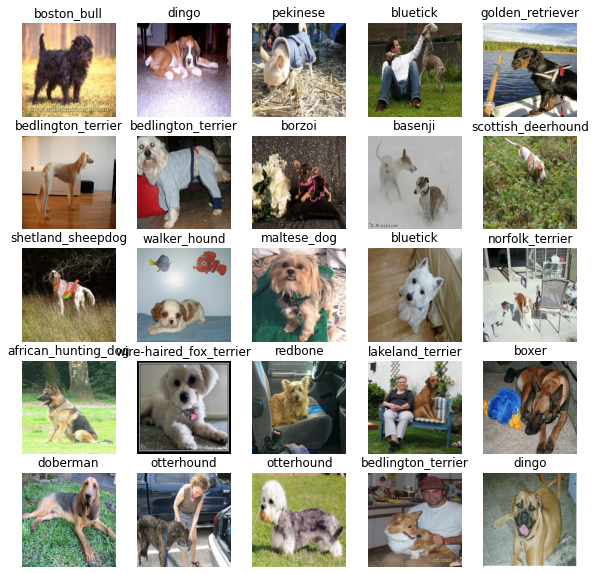

In [41]:
show_25_images(train_images, train_labels)

#### **Visualize validation set batches**

32 32


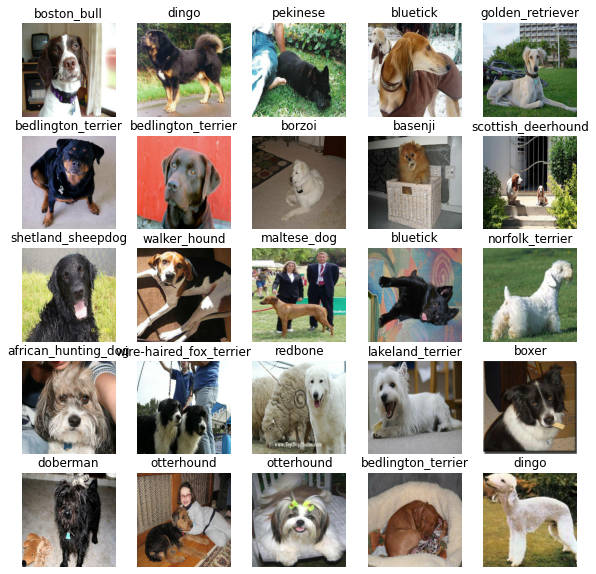

In [42]:
val_images, val_labels = next(val_data.as_numpy_iterator())
print(len(val_images), len(val_labels))
show_25_images(val_images, val_labels)

## **Building a Model**

In [43]:
IMG_SIZE

224

In [44]:
INPUT_SHAPE = [None, IMG_SIZE, IMG_SIZE, 3] # batch, height, width, color channel
OUTPUT_SHAPE = len(unique_breeds)

In [45]:
INPUT_SHAPE, OUTPUT_SHAPE

([None, 224, 224, 3], 120)

In [46]:
# mobilenet_v2 model from Tensorflow hub
MODEL_URL = "https://tfhub.dev/google/imagenet/mobilenet_v2_130_224/classification/4"

### **Function to create model to accept given input and output shape: create_model()**

In [47]:
def create_model(input_shape = INPUT_SHAPE, output_shape = OUTPUT_SHAPE, model_url = MODEL_URL):

  # setup model layers
  model = tf.keras.Sequential([hub.KerasLayer(MODEL_URL),
                               tf.keras.layers.Dense(units = OUTPUT_SHAPE,
                                                     activation = "softmax")
                               ])
  
  model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
  model.build(INPUT_SHAPE)

  return model

In [48]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1001)              5432713   
                                                                 
 dense (Dense)               (None, 120)               120240    
                                                                 
Total params: 5,552,953
Trainable params: 120,240
Non-trainable params: 5,432,713
_________________________________________________________________


### **Creating Callbacks**

Tensorboard & Early Stopping

In [49]:
# load tensorboard notebook extension
%load_ext tensorboard

In [50]:
# creats logs folder to tensorboard logs
!mkdir /content/Dog\ Vision/logs

In [51]:
# create function for tensorboard callback
def create_tensorboard_callback():
  # create oog directory
  logdir = os.path.join("/content/Dog Vision/logs",
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  
  return tf.keras.callbacks.TensorBoard(logdir)

In [52]:
#early stopping callback function
early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "val_accuracy", patience = 3)

## **Training Model**

In [53]:
NUM_EPOCHS = 100 #@param {type:"slider", min:10, max:100, steps:10}

In [54]:
# check GPU availabbility

if tf.config.list_physical_devices("GPU"):
  print("RUNNING ON GPU")
else:
  print("NOT RUNNING ON GPU")

RUNNING ON GPU


### **Function to train model with callbacks: train_model()**

In [55]:
def train_model():
  """
  trains a given model and returns a trained model
  """
  model = create_model()

  #create new tensorboard session everytime we train a model
  tensorboard = create_tensorboard_callback()

  #fit a model to data and add callbacks
  model.fit(x = train_data, epochs = NUM_EPOCHS,
            validation_data = val_data,
            validation_freq = 1,
            callbacks = [tensorboard, early_stopping])
  # return fitted model
  return model

In [56]:
model =  train_model()

Epoch 1/100
75/75 [==============================] - 25s 155ms/step - loss: 2.9051 - accuracy: 0.3771 - val_loss: 1.2691 - val_accuracy: 0.7033
Epoch 2/100
75/75 [==============================] - 11s 144ms/step - loss: 0.6108 - accuracy: 0.8621 - val_loss: 0.9002 - val_accuracy: 0.7583
Epoch 3/100
75/75 [==============================] - 10s 137ms/step - loss: 0.2678 - accuracy: 0.9596 - val_loss: 0.7944 - val_accuracy: 0.7850
Epoch 4/100
75/75 [==============================] - 11s 147ms/step - loss: 0.1490 - accuracy: 0.9887 - val_loss: 0.7593 - val_accuracy: 0.7783
Epoch 5/100
75/75 [==============================] - 11s 150ms/step - loss: 0.0964 - accuracy: 0.9954 - val_loss: 0.7406 - val_accuracy: 0.8000
Epoch 6/100
75/75 [==============================] - 11s 150ms/step - loss: 0.0682 - accuracy: 0.9983 - val_loss: 0.7365 - val_accuracy: 0.7833
Epoch 7/100
75/75 [==============================] - 12s 154ms/step - loss: 0.0514 - accuracy: 0.9996 - val_loss: 0.7388 - val_accuracy:

### **Checking Tensorboard logs**

In [57]:
# run this cell by uncommenting below command to load tensorboard in notebook
# %tensorboard --logdir /content/Dog\ Vision/logs

## **Predictions on Validation set using trained Model**

In [58]:
#make predictions on validation batch
predictions =  model.predict(val_data, verbose = 1)
predictions

19/19 [==============================] - 12s 126ms/step


array([[7.82359336e-07, 1.21768426e-05, 3.14965678e-06, ...,
        1.59563479e-05, 1.39350523e-05, 4.27225859e-05],
       [9.27845213e-06, 1.98535636e-05, 2.82675643e-07, ...,
        8.15380830e-08, 2.57223328e-05, 1.57634054e-06],
       [1.84611781e-05, 1.35548692e-03, 1.43424386e-05, ...,
        1.72128872e-04, 2.14515185e-05, 7.35620370e-06],
       ...,
       [1.64704805e-03, 1.00454688e-02, 1.11977635e-04, ...,
        5.81824454e-03, 3.17918584e-02, 8.17115724e-05],
       [4.76480318e-06, 7.45117813e-06, 1.52473774e-06, ...,
        1.26030181e-05, 6.73820090e-04, 1.18904491e-05],
       [4.40734948e-06, 2.24772539e-05, 1.03196726e-05, ...,
        6.51959749e-03, 2.54157640e-04, 2.70635082e-05]], dtype=float32)

In [59]:
predictions.shape

(600, 120)

In [60]:
# first prediction
index = 42
print(predictions[index])
print(f"Max value (probability of prediction): {np.max(predictions[index])}")
print(f"Sum: {np.sum(predictions[index])}")
print(f"Max index: {np.argmax(predictions[index])}")
print(f"Predicted label: {unique_breeds[np.argmax(predictions[index])]}")

[2.2350861e-09 9.3651622e-08 4.0437231e-09 5.3669470e-07 4.9071506e-08
 3.6935064e-09 1.9873109e-07 3.5141585e-09 3.5445880e-06 6.2213041e-07
 1.8219025e-08 1.4649976e-09 5.3649132e-06 4.0625606e-10 9.9989057e-01
 1.1389649e-07 9.2627079e-09 3.1874347e-07 1.8928161e-09 5.5864020e-09
 1.8822398e-08 2.3871806e-07 5.6986113e-07 1.1872668e-06 5.9211413e-08
 1.1476944e-05 9.0734514e-10 3.9913306e-10 1.3692929e-07 1.8363668e-08
 1.1352761e-08 6.9911562e-06 1.5551866e-07 4.3414293e-08 2.2555794e-08
 1.1247072e-07 6.2950050e-09 8.3944926e-08 4.1963315e-08 1.3350734e-06
 2.3885137e-08 5.7621369e-10 3.5543501e-08 4.5352252e-07 1.9826483e-09
 6.7652877e-07 4.1053954e-06 2.4655686e-09 2.3613137e-07 8.8001769e-07
 1.1282921e-07 2.3234638e-07 4.9223466e-08 2.6693662e-08 1.4012365e-09
 2.6964657e-09 4.6164455e-06 9.1819395e-08 2.0393513e-07 5.2845013e-09
 3.1396166e-09 3.2443923e-09 9.5681374e-09 8.2497449e-09 3.3294761e-08
 5.6324001e-08 1.0082458e-08 2.4912131e-07 1.4948142e-07 8.6545349e-09
 1.570

In [61]:
unique_breeds[113]

'walker_hound'

### **Get Classification Report and Visualize Confusion Matrix**

In [62]:
# converting porbabilities of predictions to numbers
preds_1000samples = predictions.argmax(axis=1)
preds_1000samples

array([ 41, 108,  54,  93,  93,  91,  67,  52,  87,   8,  44, 113,  90,
        95,  98, 109,  16,  66, 116,  16,   0,   3, 100, 112,  10,  97,
        61,  16,  76,  32,  34,   3,   7,  41, 118,   2,  94,  60,  10,
        24,   0,   6,  14,  96,  91,  85,  50,  79,  96,  33,  85,  22,
        14,  45, 113,  57,  59,  63,  28, 106,  13,   9,  29,  98,  58,
        34,  80, 110,  66,  35,  96,   1,  28,  95,   3,  73, 115,  26,
        96,  39,  54,  78,  54,  44,  12,  26,  55,  17,  53,   7,  21,
        90,  55,  72,  60,  83, 108,  12,  94, 104,  42, 110,  96,  65,
        24,  94, 110,  82, 106,  39,  28,  62,  59,  42,  97,  22,  19,
        31,  41,  29,  35,  29, 116,  35,   1,  19,  21, 112,  83,  50,
        61, 102,  14,  58, 110,  57, 115,  83,  36,  73,  42, 117, 114,
        92,  53,  34,  29, 109, 116,  68, 102, 117,  40, 108,  26,  55,
       117,  67,  12,  86,   1,  55, 116,  42,  27, 108,  75,  91,   0,
        47,   7, 116,  44,  44, 119,  36,  96,  68,  20,  15,   

In [63]:
# coverting validation labels to numbers
yTrue_1000samples = np.array(y_val).argmax(axis = 1)
yTrue_1000samples

array([ 41, 108,  54,  93,  93,  91,  67,  52,  87,   8,  44, 113,  90,
        95,  98,  70,  33,  66, 116,  16,   0,   3,  61, 112,  10,  59,
        61,  16,  76,  32,  34,   3,   7,  41, 118,   2,  94,  60,  10,
        24,   0,   6,  14,  96,  91,  30,  50,  79,  96,  33,  85,  22,
        14,  45, 113,  57,  59,  74,  28, 106,  13,  39,   7,  98,  58,
        34,  80, 110,  18,  26,  96,   1,  28,  95,   3,  73, 115,  26,
        96,  39,  54,  78,  54,  44,  12,  26,  55,  36,  53,   7,  21,
        90,  55,  72,  60,  83, 108,  12,  94,  90,  42, 110,  96,  65,
        24,  62, 110,  82, 106, 113,   3,  62,  59,  42,  59,  72,  19,
        31,  41,  29,  76,  29, 116,  98,   1,  19,  21, 112,  83,  38,
        61, 102,  12,  58,  76,  57, 115,  83,  36,  73,  42, 117, 114,
        92,  38,  34,   9, 109, 116,  68,   6,  67,  40, 108,  26,  55,
       104,  67,  50,  86,   1,  55, 116,  42,   9, 108,   5,  91,   0,
        47,   7, 116,  44, 112,   6,  36,  48,  68,  20,  15,   

In [64]:
# compare validation labels with predictions
comp_correct = np.array(y_val).argmax(axis = 1) == predictions.argmax(axis=1)
comp_incorrect = np.array(y_val).argmax(axis = 1) != predictions.argmax(axis=1)
print("Correct number of predictions", comp_correct.sum())
print("Incorrect number of predictions", comp_incorrect.sum())

Correct number of predictions 479
Incorrect number of predictions 121


In [65]:
print(classification_report(yTrue_1000samples,preds_1000samples))

              precision    recall  f1-score   support

           0       1.00      0.67      0.80         9
           1       0.89      0.89      0.89         9
           2       1.00      1.00      1.00         2
           3       0.89      0.89      0.89         9
           4       0.50      0.50      0.50         2
           5       0.75      0.38      0.50         8
           6       1.00      0.60      0.75         5
           7       0.90      0.90      0.90        10
           8       1.00      1.00      1.00         3
           9       0.83      0.71      0.77         7
          10       0.92      1.00      0.96        11
          11       0.80      1.00      0.89         8
          12       0.83      0.83      0.83         6
          13       1.00      0.90      0.95        10
          14       0.83      0.83      0.83         6
          15       0.75      1.00      0.86         3
          16       0.29      1.00      0.44         2
          17       0.67    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


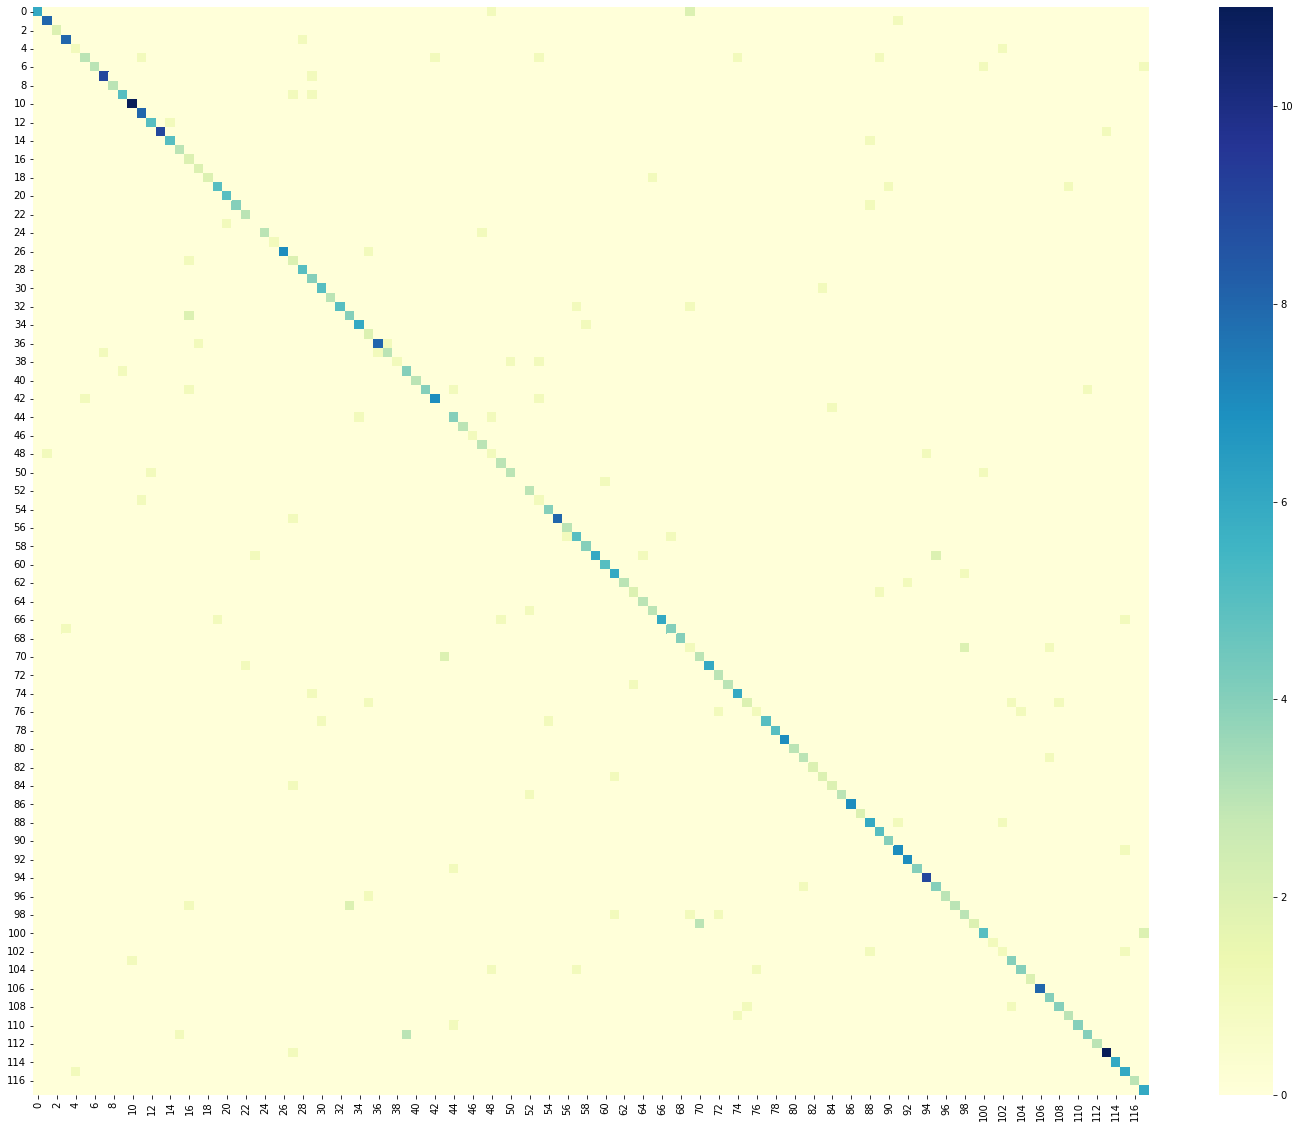

In [66]:
plt.figure(figsize = (25,20))
sns.heatmap(confusion_matrix(yTrue_1000samples,preds_1000samples), cmap = "YlGnBu");

#### **Function to print classification report and plot confusion matrix: class_report()**

In [67]:
def class_report(preds, y):
  preds = preds.argmax(axis = 1)
  y = np.array(y).argmax(axis = 1)
  print(classification_report(y,preds))
  print("\n\n\n")
  plt.figure(figszie = (25,20))
  sns.heatmap(confusion_matrix(y,preds), cmap = "YlGnBu");

### **Function to take predictions and return class label: get_pred_label()**

In [68]:
def get_pred_label(prediction_probabilities):
  """
  turns an array of predictions probabilities into a label
  """
  return unique_breeds[np.argmax(prediction_probabilities)]

pred_label = get_pred_label(predictions[81])
pred_label

'newfoundland'

### **Unbatch Validation Data**

In [69]:
val_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [70]:
images_ = []
labels_ = []

for image, label in val_data.unbatch().as_numpy_iterator():
  images_.append(image)
  labels_.append(label)

len(images_), len(labels_)

(600, 600)

In [71]:
print("Validation: ",get_pred_label(labels_[0]))
print("Predicted", get_pred_label(predictions[0]))

Validation:  english_springer
Predicted english_springer


### **Function to unbatch a batch dataset and compare predictions with true label: unbatchify()**

In [72]:
def unbatchify(data):
  """
  takes a batched dataset of (image, label) tensors and 
  returns seperate arrays of images and labels
  """
  images_ = []
  labels_ = []

  for image, label in val_data.unbatch().as_numpy_iterator():
    images_.append(image)
    labels_.append(unique_breeds[np.argmax(label)])

  return images_, labels_


val_images, val_labels = unbatchify(val_data)

len(val_images), len(val_labels)

(600, 600)

### **Function to plot image and (prediction, prediction probability, true label) as title: plot_pred()**

In [73]:
def plot_pred(prediction_probabilities, labels, images, n = 1):
  """
  view the predictions, ground truth and image for sample n
  """
  pred_prob, true_label, image = prediction_probabilities[n], labels[n], images[n]

  # get the pred label
  pred_label = get_pred_label(pred_prob)

  # plot image and remove ticks
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])

  # change to colour of the title based on predictions's truth value
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # change plot title to be predicted, probability of prediction and truth label
  plt.title("{} {:2.0f}% {}".format(pred_label, np.max(pred_prob)*100, true_label),
            color = color)

  

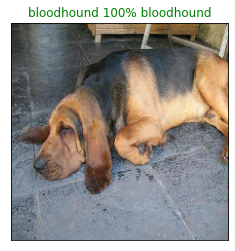

In [74]:
# validating plot_pred() func.
plot_pred(prediction_probabilities= predictions,
          labels = val_labels,
          images = val_images, n = 42)

### **Function to visualize model's top predictions: plot_pred_conf()**

In [75]:
def plot_pred_conf(prediction_probabilities, labels, n=1):
  """
  plot the top 10 highest prediction confidences along with the
  truth label for sample n.
  """
  pred_prob, true_label = prediction_probabilities[n], labels[n]

  # get predicted label
  pred_label = get_pred_label(pred_prob)
  # find top 10 prediction confidence indexes
  top_10_pred_indexes = pred_prob.argsort()[-10:][::-1]
  # find top 10 prediction confidence values
  top_10_pred_values = pred_prob[top_10_pred_indexes]
  # find top 10 prediction labels
  top_10_pred_labels = unique_breeds[top_10_pred_indexes]

  # setup plot
  top_plot = plt.bar(np.arange(len(top_10_pred_labels)),
                     top_10_pred_values,
                     color = 'grey')
  plt.xticks(np.arange(len(top_10_pred_labels)),
             labels = top_10_pred_labels,
             rotation = "vertical")
  
  # chnage color for true label
  if np.isin(true_label, top_10_pred_labels):
     top_plot[np.argmax(top_10_pred_labels == true_label)].set_color("green")
  else:
    pass

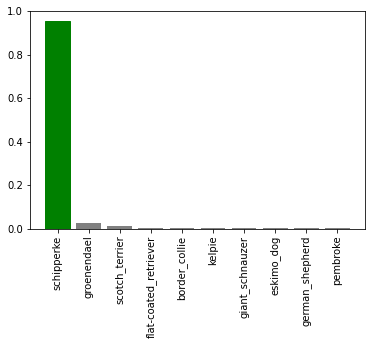

In [76]:
# validate plot_pred_conf() func.
plot_pred_conf(prediction_probabilities = predictions,
               labels = val_labels,
               n = 13)

### **Check few predictions and model's top predictions**

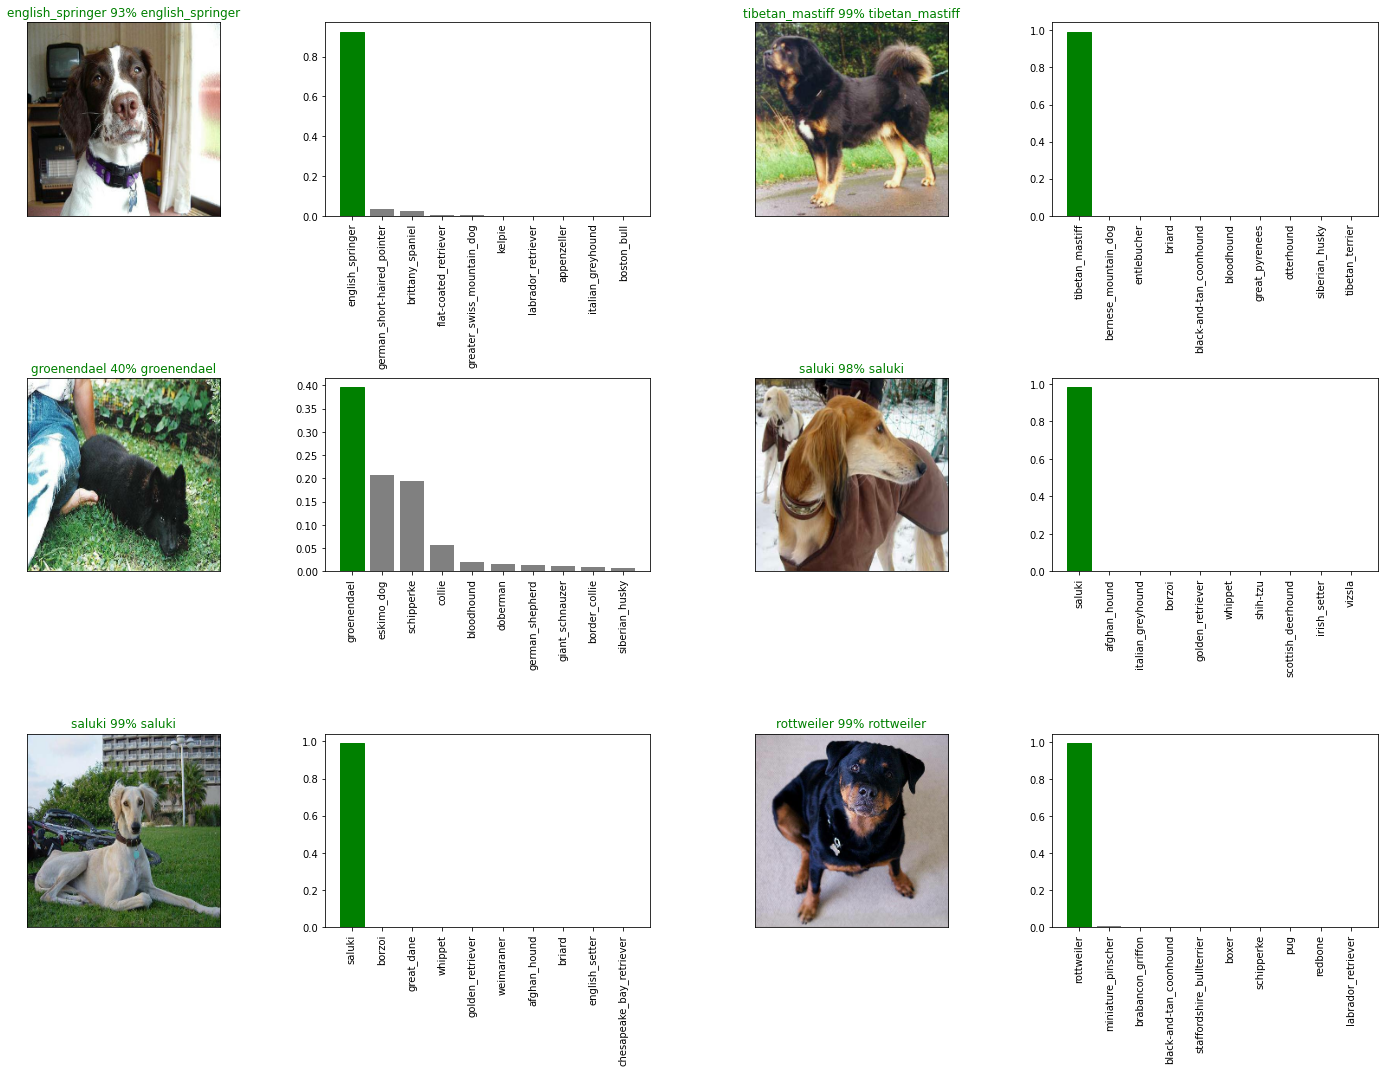

In [77]:
i_multiplier = 0
num_rows = 3
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(5*2*num_cols, 5*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_pred(prediction_probabilities=predictions,
            labels=val_labels,
            images=val_images,
            n=i+i_multiplier)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_pred_conf(prediction_probabilities=predictions,
                labels=val_labels,
                n=i+i_multiplier)
plt.tight_layout(h_pad=1.0)
plt.show()

## **Save and Load Model**

In [78]:
# create models folder to save models
!mkdir /content/Dog\ Vision/models

### **Function to save and load model: save_model() & load_model()**

In [79]:
# function to save a model

def save_model(model, suffix = None):
  """
  saves model and appends a suffix (string)
  """
  modeldir = os.path.join("/content/Dog Vision/models", 
                          datetime.datetime.now().strftime("%Y%m%d-%H%M%s"))
  
  model_path = modeldir + "-" + suffix + ".h5" # save format for model

  print(f"Saving model to {model_path} >>>")
  model.save(model_path)
  return model_path

# function to load trained model

def load_model(model_path):
  """
  loads a saved model from specified path
  """
  model = tf.keras.models.load_model(model_path,
                                     custom_objects = {"KerasLayer": hub.KerasLayer})
  
  return model



In [80]:
# save model trained on 1000 images
suff = str(NUM_IMAGES) + "-images-mobilenetv2-Adam"
path = save_model(model, suffix = suff)
print(path)

trained_1000_img_model = load_model(path)
# ignore warnings

Saving model to /content/Dog Vision/models/20211211-09021639213363-3000-images-mobilenetv2-Adam.h5 >>>
/content/Dog Vision/models/20211211-09021639213363-3000-images-mobilenetv2-Adam.h5


In [81]:
trained_1000_img_model

In [82]:
# evaluate trained model 100 images
model.evaluate(val_data)

19/19 [==============================] - 2s 111ms/step - loss: 0.7278 - accuracy: 0.7983


[0.7277505397796631, 0.7983333468437195]

In [83]:
# evaluate saved and loaded model
trained_1000_img_model.evaluate(val_data)

19/19 [==============================] - 3s 107ms/step - loss: 0.7278 - accuracy: 0.7983


[0.7277505397796631, 0.7983333468437195]

## **Training and saving model with complete training data**

In [84]:
len(X), len(y)

(10222, 10222)

In [85]:
# create batches of full dataset
full_data = create_data_batches(X,y)

Creating training data batches...


In [86]:
full_data

<BatchDataset shapes: ((None, 224, 224, 3), (None, 120)), types: (tf.float32, tf.bool)>

In [87]:
# create model
full_model = create_model()

In [88]:
# create full model callbacks
full_model_tensorboard = create_tensorboard_callback()
full_model_early_stopping = tf.keras.callbacks.EarlyStopping(monitor = "accuracy",
                                                             patience = 3)

In [89]:
# fill full model on full data

full_model.fit(x = full_data,
               epochs = NUM_EPOCHS,
               callbacks = [full_model_early_stopping, full_model_tensorboard])

Epoch 1/100
320/320 [==============================] - 43s 119ms/step - loss: 1.3306 - accuracy: 0.6681
Epoch 2/100
320/320 [==============================] - 39s 122ms/step - loss: 0.3980 - accuracy: 0.8833
Epoch 3/100
320/320 [==============================] - 42s 131ms/step - loss: 0.2365 - accuracy: 0.9369
Epoch 4/100
320/320 [==============================] - 43s 134ms/step - loss: 0.1542 - accuracy: 0.9641
Epoch 5/100
320/320 [==============================] - 43s 136ms/step - loss: 0.1067 - accuracy: 0.9776
Epoch 6/100
320/320 [==============================] - 43s 134ms/step - loss: 0.0780 - accuracy: 0.9865
Epoch 7/100
320/320 [==============================] - 44s 137ms/step - loss: 0.0584 - accuracy: 0.9920
Epoch 8/100
320/320 [==============================] - 44s 136ms/step - loss: 0.0462 - accuracy: 0.9940
Epoch 9/100
320/320 [==============================] - 42s 132ms/step - loss: 0.0383 - accuracy: 0.9957
Epoch 10/100
320/320 [==============================] - 40s 124m

In [90]:
# save model
save_model(full_model, suffix = "full-image-set-mobilenetv2_Adam")

Saving model to /content/Dog Vision/models/20211211-09241639214699-full-image-set-mobilenetv2_Adam.h5 >>>


'/content/Dog Vision/models/20211211-09241639214699-full-image-set-mobilenetv2_Adam.h5'

## **Making predictions on Test data**

### **Loading Test data**

In [91]:
# creating list with test data filenames
test_path = r"/content/Dog Vision/test/"
test_filenames = [test_path + fname for fname in os.listdir(test_path)]
test_filenames[:10]

['/content/Dog Vision/test/11901bce1f422ef3babd9e37d799a9d8.jpg',
 '/content/Dog Vision/test/582c346847be9a10fcc5edf5656896c7.jpg',
 '/content/Dog Vision/test/1fe29466bff45f20047fc20efe5628b3.jpg',
 '/content/Dog Vision/test/90b849ec2527119051bb550810dbd075.jpg',
 '/content/Dog Vision/test/115207097231aeb2bd45ff9a87b97018.jpg',
 '/content/Dog Vision/test/0ae295e67635319202b6fbc2b0be2fcb.jpg',
 '/content/Dog Vision/test/1820c9324897823981dc2e50bb155873.jpg',
 '/content/Dog Vision/test/08db8163ff5451ae44b7496b5c9ee05a.jpg',
 '/content/Dog Vision/test/67709931f291cf5e4f2931c65c4c80af.jpg',
 '/content/Dog Vision/test/4df88ec27471b28d1cbd7ef736f187ef.jpg']

In [92]:
len(test_filenames)

10357

In [93]:
# create test data batches
test_data = create_data_batches(test_filenames, test_data = True)

Creating test data batches...


In [94]:
test_data

<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

### **Predictions on test data batch**

In [95]:
test_predictions = full_model.predict(test_data, verbose = 1)

324/324 [==============================] - 48s 148ms/step


### **Save and load predictions**

In [96]:
np.savetxt("/content/Dog Vision/preds_array.csv", 
           test_predictions, delimiter = ",")

In [97]:
test_predictions = np.loadtxt("/content/Dog Vision/preds_array.csv",
                              delimiter = ",")

In [98]:
print("Shape of test predictions:", test_predictions.shape)
test_predictions[:10]

Shape of test predictions: (10357, 120)


array([[1.08634097e-08, 1.46397445e-08, 4.22153895e-10, ...,
        7.10335613e-08, 6.02124032e-07, 8.37302494e-08],
       [4.67315564e-09, 1.75100334e-09, 4.54624449e-10, ...,
        6.93527991e-09, 5.00753401e-07, 1.43303536e-10],
       [1.22586120e-04, 4.24257138e-07, 2.71964211e-08, ...,
        1.41187452e-11, 8.07578218e-08, 2.10037541e-07],
       ...,
       [6.33038717e-12, 5.85628117e-12, 1.02371731e-13, ...,
        2.94728875e-06, 2.82770002e-10, 5.03846209e-09],
       [2.02116917e-11, 9.74492501e-11, 1.23185584e-09, ...,
        8.53136312e-11, 4.15962995e-06, 5.85308726e-08],
       [5.90842861e-11, 9.31840471e-09, 5.20420219e-16, ...,
        1.95095828e-12, 2.57050681e-14, 4.61591409e-15]])

### **Preparing dataframe from test data predictions**

In [99]:
# create dataframe with empty columns
preds_df = pd.DataFrame(columns = ["id"] + list(unique_breeds))
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier


In [100]:
### append test image id to predicted dataframe
# take test id's from filenames in test folder
test_ids = [os.path.splitext(path)[0] for path in os.listdir(test_path)]
preds_df["id"] = test_ids

In [101]:
# add prediction probabilities to each dog breed column
preds_df[list(unique_breeds)] = test_predictions
preds_df.head()

,id,affenpinscher,afghan_hound,african_hunting_dog,airedale,american_staffordshire_terrier,appenzeller,australian_terrier,basenji,basset,beagle,bedlington_terrier,bernese_mountain_dog,black-and-tan_coonhound,blenheim_spaniel,bloodhound,bluetick,border_collie,border_terrier,borzoi,boston_bull,bouvier_des_flandres,boxer,brabancon_griffon,briard,brittany_spaniel,bull_mastiff,cairn,cardigan,chesapeake_bay_retriever,chihuahua,chow,clumber,cocker_spaniel,collie,curly-coated_retriever,dandie_dinmont,dhole,dingo,doberman,...,norwegian_elkhound,norwich_terrier,old_english_sheepdog,otterhound,papillon,pekinese,pembroke,pomeranian,pug,redbone,rhodesian_ridgeback,rottweiler,saint_bernard,saluki,samoyed,schipperke,scotch_terrier,scottish_deerhound,sealyham_terrier,shetland_sheepdog,shih-tzu,siberian_husky,silky_terrier,soft-coated_wheaten_terrier,staffordshire_bullterrier,standard_poodle,standard_schnauzer,sussex_spaniel,tibetan_mastiff,tibetan_terrier,toy_poodle,toy_terrier,vizsla,walker_hound,weimaraner,welsh_springer_spaniel,west_highland_white_terrier,whippet,wire-haired_fox_terrier,yorkshire_terrier
0,11901bce1f422ef3babd9e37d799a9d8,1.08634e-08,1.46397e-08,4.22154e-10,1.05808e-08,1.97902e-06,6.34821e-08,1.54885e-05,5.18622e-05,0.00335746,0.420484,6.49386e-09,5.94665e-10,1.79864e-06,2.85703e-07,3.01379e-06,0.575019,6.429e-08,3.2476e-07,3.81769e-10,5.7912e-08,8.48858e-11,4.64796e-07,1.91075e-08,7.35546e-12,1.90206e-07,3.38748e-08,1.8417e-08,7.94131e-06,1.20175e-08,1.04451e-05,5.10729e-08,1.64315e-07,8.16047e-06,5.36315e-10,6.09343e-10,7.07803e-06,4.27921e-07,9.29617e-09,4.91402e-11,...,1.69033e-09,2.5979e-08,5.81535e-10,1.41327e-10,3.96439e-07,7.03977e-08,1.14243e-05,3.06317e-09,1.10267e-08,4.21417e-06,1.44332e-09,5.60809e-11,7.10721e-08,2.19163e-07,2.74893e-09,1.59382e-08,3.46119e-08,1.90105e-09,4.61787e-07,7.94585e-07,2.30217e-06,8.72289e-07,2.08446e-05,2.13935e-08,5.83021e-09,6.7217e-07,2.21198e-10,3.1972e-09,3.76046e-11,4.23618e-10,5.76114e-06,0.000763609,1.5215e-06,0.000163474,1.39829e-07,1.39917e-07,6.48629e-07,7.10336e-08,6.02124e-07,8.37302e-08
1,582c346847be9a10fcc5edf5656896c7,4.67316e-09,1.751e-09,4.54624e-10,8.17911e-08,9.64517e-07,3.701e-06,3.00343e-07,2.40907e-07,2.28036e-06,1.213e-06,2.38527e-09,1.82418e-06,2.46672e-11,0.000117967,2.04405e-08,6.42992e-10,3.04698e-08,1.54799e-07,8.42545e-09,4.24754e-10,6.86663e-10,7.72118e-05,5.11277e-08,3.44812e-08,0.000380237,5.78657e-06,8.39826e-11,5.32494e-05,2.5058e-06,4.94356e-12,2.07412e-05,1.03152e-06,1.68333e-08,1.64958e-07,8.11222e-12,7.26683e-08,1.15959e-07,5.25641e-07,5.79567e-11,...,1.21982e-09,4.93752e-11,3.58157e-08,1.99979e-10,0.0007352,1.16794e-08,0.000565779,9.67067e-12,1.42847e-09,1.5193e-08,1.17758e-08,1.67488e-07,0.972787,2.18032e-07,6.30791e-10,4.48822e-09,3.78012e-10,8.54407e-12,3.18614e-08,2.33271e-06,7.38264e-09,3.40001e-08,4.96647e-08,6.55953e-05,8.90471e-10,2.07076e-08,6.10134e-10,3.94252e-10,2.05606e-06,4.35474e-08,2.84041e-08,1.78046e-08,4.30156e-10,2.88423e-07,8.73631e-11,0.0251154,3.88259e-09,6.93528e-09,5.00753e-07,1.43304e-10
2,1fe29466bff45f20047fc20efe5628b3,0.000122586,4.24257e-07,2.71964e-08,2.04897e-09,6.18247e-10,4.07216e-14,1.46589e-11,1.6017e-07,2.51345e-07,2.6475e-10,1.26317e-07,6.6346e-08,5.62646e-09,1.42287e-07,4.81005e-10,3.52494e-09,1.82106e-08,4.78597e-07,1.00505e-08,9.29566e-09,0.00194684,4.69636e-09,1.25334e-08,7.26569e-07,1.42275e-10,4.98058e-06,8.55943e-09,1.34122e-08,2.42092e-10,2.06084e-12,1.53956e-11,7.31365e-09,6.82094e-06,1.14905e-09,4.02805e-10,2.7744e-05,4.74961e-13,2.63822e-09,1.8557e-12,...,2.00265e-09,9.88278e-11,0.00261009,2.26425e-05,3.3944e-11,0.00127104,1.98738e-11,2.54234e-12,2.92156e-06,7.30694e-10,7.81039e-09,3.67315e-09,1.27431e-08,3.17728e-07,1.09006e-09,5.50052e-10,8.78335e-09,4.41996e-11,0.000365874,5.6146e-07,0.0351798,3.69105e-09,1.13219e-05,2.58185e-07,1.08128e-11,2.80591e-10,9.05177e-05,1.51464e-10,4.36256e-06,0.00542674,4.71892e-05,2.64743e-12,4.64442e-10,2.27075e-10,3.74365e-10,4.97872e-09,2.39659e-08,1.41187e-1

### **Save test predictions dataframe**

In [102]:
# save predictions dataframe to csv file
preds_df.to_csv("/content/Dog Vision/full_model_preds_submission.csv",
                index = False)

## **Make prediction on custom images**

need to have custom_folder in Dog Vision working directory to proceed

custom_folders can have photos we want to classify

In [106]:
!mkdir /content/Dog\ Vision/custom_folder
!wget -P /content/Dog\ Vision/custom_folder https://cdn.pixabay.com/photo/2017/09/25/13/12/cocker-spaniel-2785074_960_720.jpg
!wget -P /content/Dog\ Vision/custom_folder https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/smartest-dog-breeds-1553287693.jpg

--2021-12-11 09:30:36--  https://cdn.pixabay.com/photo/2017/09/25/13/12/cocker-spaniel-2785074_960_720.jpg
Resolving cdn.pixabay.com (cdn.pixabay.com)... 104.18.20.183, 104.18.21.183, 2606:4700::6812:15b7, ...
Connecting to cdn.pixabay.com (cdn.pixabay.com)|104.18.20.183|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104310 (102K) [image/jpeg]
Saving to: ‘/content/Dog Vision/custom_folder/cocker-spaniel-2785074_960_720.jpg’

cocker-spaniel-2785 100%[===================>] 101.87K  --.-KB/s    in 0.006s  

2021-12-11 09:30:36 (16.7 MB/s) - ‘/content/Dog Vision/custom_folder/cocker-spaniel-2785074_960_720.jpg’ saved [104310/104310]

--2021-12-11 09:30:36--  https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/smartest-dog-breeds-1553287693.jpg
Resolving hips.hearstapps.com (hips.hearstapps.com)... 151.101.0.155, 151.101.64.155, 151.101.128.155, ...
Connecting to hips.hearstapps.com (hips.hearstapps.com)|151.101.0.155|:443... connected.
HTTP request sent,

In [111]:
custom_path = "/content/Dog Vision/custom_folder/"
custom_image_paths = [custom_path + fname for fname in os.listdir(custom_path)]
custom_image_paths

['/content/Dog Vision/custom_folder/smartest-dog-breeds-1553287693.jpg',
 '/content/Dog Vision/custom_folder/cocker-spaniel-2785074_960_720.jpg']

In [112]:
custom_data = create_data_batches(custom_image_paths, test_data = True)
custom_data

Creating test data batches...


<BatchDataset shapes: (None, 224, 224, 3), types: tf.float32>

In [113]:
# make predictions
custom_preds = full_model.predict(custom_data)

In [114]:
# save predictions
custom_pred_labels = [get_pred_label(custom_preds[i]) for i in range(len(custom_preds))]
custom_pred_labels

['german_shepherd', 'cocker_spaniel']

In [115]:
# unbatch custom image batch to get image data
custom_images = []

for image in custom_data.unbatch().as_numpy_iterator():
  custom_images.append(image)

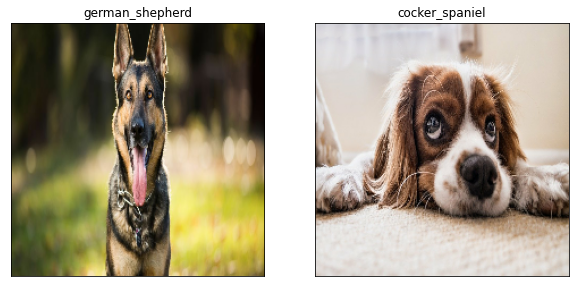

In [116]:
# check custom image predictions

plt.figure(figsize = (10,10))

for i, image in enumerate(custom_images):
  plt.subplot(1,2,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(custom_pred_labels[i])
  plt.imshow(image)

## **Run below cell to create zip file of whole working directory**

In [117]:
# zf = zipfile.ZipFile("DogVision.zip", "w")
# for dirname, subdirs, files in os.walk(r"/content/Dog Vision"):
#     zf.write(dirname)
#     for filename in files:
#         zf.write(os.path.join(dirname, filename))
# zf.close()